 # Logistic Regression

 Logistic Regression is a statistical method for predicting binary outcomes from data.

 Examples of this are "yes" vs "no" or "high credit risk" vs "low credit risk".

 These are categories that translate to probability of being a 0 or a 1

 We can calculate logistic regression by adding an activation function as the final step to our linear model.

 This converts the linear regression output to a probability.

In [1]:
# Import matplotlib and Pandas libraries

import matplotlib.pyplot as plt
import pandas as pd

 # Generate some data

In [9]:
# Generate a synthetic dataset for our example using 
# sklearn.datasets make_blobs module

from sklearn.datasets import make_blobs


# Now we'll make data clusters of synthetic data:

# the centers argument specifies the number of clusters in the dataset
# the random_state argument ensures the reproducibility of this dataset - 
      # keeping the random_state variable consistent will allow 
      # identical generation of the dataset in the future.

X, y = make_blobs(centers=2, random_state=42)

# We have split the dataset into X and y arrays.
      # X contains the coordinates for each data point
      # y contains information on the class of each data point
            # Class, here, referring to the catagorical options 
            # available for the linear regression model, encoded as 0 or 1

# In this case X is the independent variable, y is the dependent variable

# We're looking to classify dots into one of two categories (Purple or Yellow) 
# based on their coordinates:

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


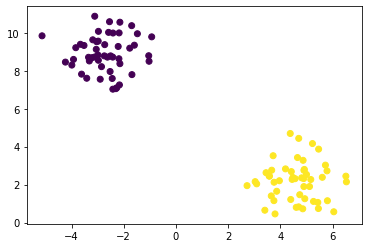

In [8]:
## Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

 # Split our data into training and testing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

# ^ Scikit-learn's train_test_split module takes in 4 arguments:
      # X - your independent variable given the name "X"
      # y - your dependent variable given the name "y"
      # random_state - the numerical, stored random distribution state used to reproduce your randomize data sampling instance
      # stratify - the statistical indication of how much of each data type (of y) represented in the data should be attributed to testing and training datasets
            # ^ stratify is INCREDIBLY important as you want to make sure that the distribution of different data types is representative when randomly distributed to testing and training datasets
                      # Imagine a scenario in which one class is significantly 
                      # larger than the other. For example, let's say that we're 
                      # analyzing 10,000 credit card transactions, and only 40 of 
                      # them are flagged as fraudulent. We might allocate 75% of 
                      # the dataset to the training set, and 25% to the testing set, 
                      # so we'd expect the training set to contain 75% of the fraudulent 
                      # transactions (30), and the testing set to contain 25% of the 
                      # fraudulent transactions (10). Without stratification, it's possible 
                      # for the fraudulent transactions to be distributed disproportionately — 
                      # for example, 20 to the training set and 20 to the testing set. 
                      # And as the model trains on the unrepresentative data, it can reach wrong 
                      # conclusions. It's therefore important to consider stratifying the data, 
                      # especially when the classes are severely unbalanced, or when the dataset is small.

 # Create a Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

 # Fit (train) or model using the training data

In [12]:
# Train the data                    | [A.K.A.: fit the data]
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

 # Make predictions

In [ ]:
# Validate the Logistic Regression Model

# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
0            1       1
1            0       0
2            1       1
3            1       1
4            1       1
5            0       0
6            1       1
7            1       1
8            1       1
9            0       0
10           0       0
11           1       1
12           1       1
13           0       0
14           1       1
15           0       0
16           0       0
17           0       0
18           0       0
19           0       0
20           1       1
21           1       1
22           0       0
23           0       0
24           1       1

# Validate the model using the test data

In [ ]:
# Assess / Validate the model using sklearn.metrics & accuracy_score

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

# ^ 
# The accuracy score came back as 1.0, meaning the preditions 
# were 100% accurate based on our test data

# This means that this is a 100% valid model

# ^ In normal practice though, a 1.0 Accuracy score is rare 
# and should maybe raise suspicion of overfitting
        # 'Overfitting' refers to an instance in which the patterns 
        # picked up by a model are too specific to a specific dataset, 
        # rather than an accurate representation of the real world, which 
        # won't 100% correspond to ANY model

1.0

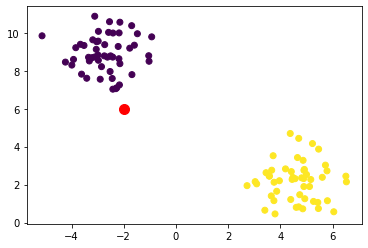

In [15]:
# Now we're going to introduce a new data point (shown in red) and 
# make the model to classify the sample as belonging to either 
# class 0 or class 1

# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
# ^ Interesting note: the numpy array is double bracketed so when we call for
# the values in 'new_data' we use new_data[0,0] or new_data[0,1] to call the
# first (and only) index, then the first or second value (index) within that.
# If you delete a set of brackets you can use new_data[0] and new_data[1].

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [ ]:
# Use predict() to have the model classify the new (red) data point (dot)

# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]
